## Project B - Big Data Concepts 
### Capital Bikeshare - Khirey Deepak - Fall 2019

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pymongo
import pprint #for pretty printing
import re
from pymongo import MongoClient
import math
from bson.code import Code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
from bson.decimal128 import Decimal128, create_decimal128_context
import decimal
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from scipy import stats
import pylab as pl
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

### Connecting to MongoDB and getting Collection

In [2]:
#Use MongoClient to connect to the already running mongod server
client = MongoClient('localhost', 27017)

In [3]:
db = client['projectB']
collection = db['bike']
doc_iterator = collection.find()

In [4]:
doc_iterator.count()

C:\Users\t7659dk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


514296

In [5]:
for doc in collection.find().limit(2):
    pprint.pprint (doc)

{'Bike number': 'W00869',
 'Duration': '221',
 'End date': '2017-01-01T00:04:23Z',
 'End station': 'm st & new jersey ave se',
 'End station number': '31208',
 'Member type': '1',
 'Start Day': 'SUNDAY',
 'Start Hour': '0',
 'Start Month': '1',
 'Start Weekend': '1',
 'Start date': '2017-01-01T00:00:41Z',
 'Start station': '3rd & tingey st se',
 'Start station number': '31634',
 '_id': ObjectId('5ddae243f101281a7803a45a')}
{'Bike number': 'W00894',
 'Duration': '1676',
 'End date': '2017-01-01T00:34:49Z',
 'End station': '8th & d st nw',
 'End station number': '31270',
 'Member type': '0',
 'Start Day': 'SUNDAY',
 'Start Hour': '0',
 'Start Month': '1',
 'Start Weekend': '1',
 'Start date': '2017-01-01T00:06:53Z',
 'Start station': 'lincoln memorial',
 'Start station number': '31258',
 '_id': ObjectId('5ddae243f101281a7803a45b')}


### Getting data into DataFrame

In [6]:
bike = db['bike']
df = json_normalize(list(bike.find()))
df.head(5)
df.shape

,Bike number,Duration,End date,End station,End station number,Member type,Start Day,Start Hour,Start Month,Start Weekend,Start date,Start station,Start station number,_id
0,W00869,221,2017-01-01T00:04:23Z,m st & new jersey ave se,31208,1,SUNDAY,0,1,1,2017-01-01T00:00:41Z,3rd & tingey st se,31634,5ddae243f101281a7803a45a
1,W00894,1676,2017-01-01T00:34:49Z,8th & d st nw,31270,0,SUNDAY,0,1,1,2017-01-01T00:06:53Z,lincoln memorial,31258,5ddae243f101281a7803a45b
2,W21945,1356,2017-01-01T00:29:47Z,new york ave & 15th st nw,31222,0,SUNDAY,0,1,1,2017-01-01T00:07:10Z,henry bacon dr & lincoln memorial circle nw,31289,5ddae243f101281a7803a45c
3,W20012,1327,2017-01-01T00:29:30Z,new york ave & 15th st nw,31222,0,SUNDAY,0,1,1,2017-01-01T00:07:22Z,henry bacon dr & lincoln memorial circle nw,31289,5ddae243f101281a7803a45d
4,W22786,1636,2017-01-01T00:34:52Z,8th & d st nw,31270,0,SUNDAY,0,1,1,2017-01-01T00:07:36Z,lincoln memorial,31258,5ddae243f101281a7803a45e


(514296, 14)

In [7]:
df = df.drop("_id",axis = 1)

In [8]:
df.columns

Index(['Bike number', 'Duration', 'End date', 'End station',
       'End station number', 'Member type', 'Start Day', 'Start Hour',
       'Start Month', 'Start Weekend', 'Start date', 'Start station',
       'Start station number'],
      dtype='object')

In [9]:
df.infer_objects()

,Bike number,Duration,End date,End station,End station number,Member type,Start Day,Start Hour,Start Month,Start Weekend,Start date,Start station,Start station number
0,W00869,221,2017-01-01T00:04:23Z,m st & new jersey ave se,31208,1,SUNDAY,0,1,1,2017-01-01T00:00:41Z,3rd & tingey st se,31634
1,W00894,1676,2017-01-01T00:34:49Z,8th & d st nw,31270,0,SUNDAY,0,1,1,2017-01-01T00:06:53Z,lincoln memorial,31258
2,W21945,1356,2017-01-01T00:29:47Z,new york ave & 15th st nw,31222,0,SUNDAY,0,1,1,2017-01-01T00:07:10Z,henry bacon dr & lincoln memorial circle nw,31289
3,W20012,1327,2017-01-01T00:29:30Z,new york ave & 15th st nw,31222,0,SUNDAY,0,1,1,2017-01-01T00:07:22Z,henry bacon dr & lincoln memorial circle nw,31289
4,W22786,1636,2017-01-01T00:34:52Z,8th & d st nw,31270,0,SUNDAY,0,1,1,2017-01-01T00:07:36Z,lincoln memorial,31258
5,W20890,1603,2017-01-01T00:34:55Z,8th & d st nw,31270,0,SUNDAY,0,1,1,2017-01-01T00:08:11Z,lincoln memorial,31258
6,W20340,473,2017-01-01T00:16:29Z,3rd & h st ne,31616,1,SUNDAY,0,1,1,2017-01-01T00:08:36Z,13th & h st ne,31611
7,W20398,200,2017-01-01T00:14:27Z,calvert st & woodley pl nw,31121,1,SUNDAY,0,1,1,2017-01-01T00:11:07Z,adams mill & columbia rd nw,31104
8,W00365,748,2017-01-01T00:25:49Z,saint asaph & madison st,31097,1,SUNDAY,0,1,1,2017-01-01T00:13:20Z,prince st & union st,31041
9,W20771,912,2017-01-01T00:29:48Z,eckington pl & q st ne,31505,1,SUNDAY,0,1,1,2017-01-01T00:14:35Z,14th & r st nw,31202


In [10]:
df.dropna(inplace=True)

In [11]:
df.describe()

,Bike number,Duration,End date,End station,End station number,Member type,Start Day,Start Hour,Start Month,Start Weekend,Start date,Start station,Start station number
count,514287,514287,514287,514287,514287,514287,514287,514287,514287,514287,514287,514287,514287
unique,4446,12291,461584,456,456,2,7,24,3,2,462357,457,457
top,W22414,401,2017-04-27T20:39:14Z,columbus circle / union station,31623,1,WEDNESDAY,17,4,0,2017-04-04T17:23:13Z,columbus circle / union station,31623
freq,292,572,6,10464,10464,385626,90346,59265,322397,379325,6,10091,10091


In [12]:
df.dtypes

Bike number             object
Duration                object
End date                object
End station             object
End station number      object
Member type             object
Start Day               object
Start Hour              object
Start Month             object
Start Weekend           object
Start date              object
Start station           object
Start station number    object
dtype: object

In [13]:
df.loc[:,'Duration'] = pd.to_numeric(df.loc[:,'Duration'])
df.loc[:,'End station number'] = pd.to_numeric(df.loc[:,'End station number'])
df.loc[:,'Start station number'] = pd.to_numeric(df.loc[:,'Start station number'])
df.loc[:,'Member type'] = pd.to_numeric(df.loc[:,'Member type'])
df.loc[:,'Start Month'] = pd.to_numeric(df.loc[:,'Start Month'])
df.loc[:,'Start Hour'] = pd.to_numeric(df.loc[:,'Start Hour'])
df.loc[:,'Start Weekend'] = pd.to_numeric(df.loc[:,'Start Weekend'])

In [14]:
df.isna().sum()

Bike number             0
Duration                0
End date                0
End station             0
End station number      0
Member type             0
Start Day               0
Start Hour              0
Start Month             0
Start Weekend           0
Start date              0
Start station           0
Start station number    0
dtype: int64

In [15]:
df[pd.isnull(df).any(axis=1)]

,Bike number,Duration,End date,End station,End station number,Member type,Start Day,Start Hour,Start Month,Start Weekend,Start date,Start station,Start station number


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028AD13209B0>,
      dtype=object)

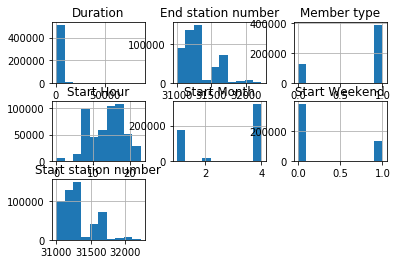

In [16]:
df.hist()

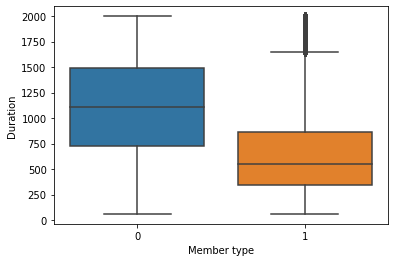

In [32]:
sns.boxplot(y=df.Duration,x=df["Member type"])

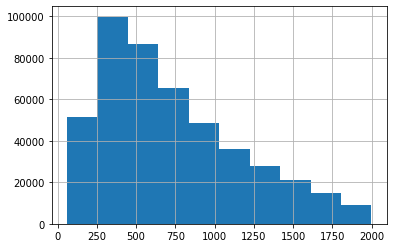

In [18]:
df[df.Duration<2000].Duration.hist()

In [19]:
df = df[df.Duration<2000]

Duration                1.000000
Start Month             0.137134
Start Weekend           0.114835
Start Hour              0.037989
Start station number   -0.020341
End station number     -0.024216
Member type            -0.398605
Name: Duration, dtype: float64


Text(0.5, 1, 'Heatmap of Correlation Matrix')

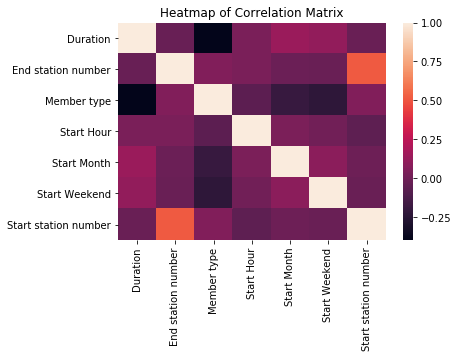

In [20]:
corr_matrix = df.corr()
print(corr_matrix["Duration"].sort_values(ascending=False))
sns.heatmap(corr_matrix, 
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)
plt.title('Heatmap of Correlation Matrix')

### Prediction Analytics

In [21]:
x=df[['Member type', 'Start Hour','Start Month', 'Start Weekend','Start station number']]
y=df["Duration"]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((322168, 5), (138072, 5), (322168,), (138072,))

In [24]:
train_scaler = preprocessing.StandardScaler().fit(x_train)
x_trains = pd.DataFrame(data = train_scaler.transform(x_train))

x_tests = pd.DataFrame(data = train_scaler.transform(x_test))

### Linear Regression

In [25]:
linmodel = LinearRegression()
linmodel.fit(x_train, y_train)
lin_preds = linmodel.predict(x_test)
print(lin_preds)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[ 603.27002411 1133.07648776  602.18509352 ... 1071.18481006  670.78649844
 1134.95337937]


In [26]:
print ("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,lin_preds)))
print ("R2 Score:",metrics.r2_score(y_test,lin_preds))

Root Mean Squared Error: 404.62817953894455
R2 Score: 0.16305453857375973


**MSE is 404.62  which is fairly good. It can be improved further by Hypertuning parameters and Feature Engineering**

### Random Forest 

In [27]:
rdforest = RandomForestRegressor(max_features= 'log2' ,n_estimators=6,criterion='mse',min_samples_leaf=2, 
                                  oob_score=True, n_jobs=-1, random_state=0)
rdforest.fit(x_train, y_train)
rdpreds = rdforest.predict(x_test)
print(rdpreds)

C:\Users\t7659dk\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=-1,
                      oob_score=True, random_state=0, verbose=0,
                      warm_start=False)

[ 692.62695233 1399.34925214  570.37888534 ... 1221.46666667  719.18253223
 1178.15833333]


In [28]:
print ("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,rdpreds)))
print ("R2 Score:",metrics.r2_score(y_test,rdpreds))

Root Mean Squared Error: 387.00920603447935
R2 Score: 0.2343549123881844


**RMSE is better than Linear Regression at 387.00 which means we are able to predict Bike Rent time +/- 387 seconds. This is valuable input for Business to Optimize Bike availability at each station.** 